<a href="https://colab.research.google.com/github/osaldealwis/CM2604CW/blob/main/CM2604CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CM2604 CW**
#V.O.V De Alwis
#RGU - 2330972
#IIT - 20232312

#**Dataset Preperation**

Uploading the Dataset

In [1]:
from google.colab import files
uploaded = files.upload()


Saving bank-full.csv to bank-full.csv


Loading and exploring the dataset

In [2]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Loading the dataset
data = pd.read_csv('bank-full.csv', sep=';')


In [4]:
#Exploring the dataset

# Display the first few rows
print(data.head())

# Checking dataset info
print(data.info())

# Checking for missing values
print(data.isnull().sum())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

Understanding the data

y
no     39922
yes     5289
Name: count, dtype: int64


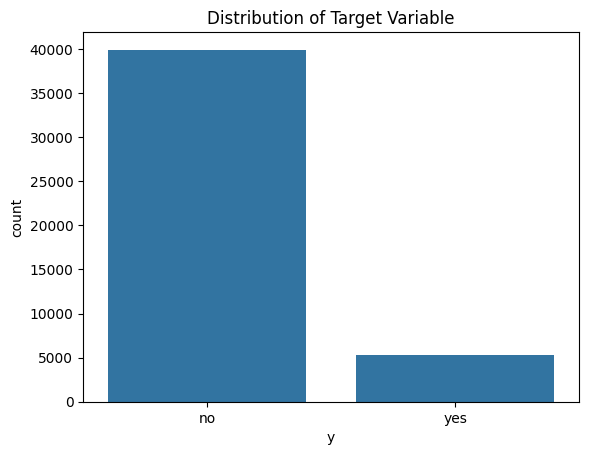

In [5]:
#Inspecting the target variable (y)
print(data['y'].value_counts())
sns.countplot(data=data, x='y')
plt.title('Distribution of Target Variable')
plt.show()


In [6]:
#Inspecting numerical features
print(data.describe())


                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [7]:
#Inspecting categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)
print(data[categorical_columns].nunique())


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64


Data Preprocessing

In [8]:
# Encoding target: 'yes' to 1, 'no' to 0
# Converting the target variable (y) into binary values
data['y'] = data['y'].map({'yes': 1, 'no': 0})


In [9]:
# Encoding Categorical Features
# One-hot encode categorical columns
data = pd.get_dummies(data, drop_first=True)
print(data.head())


   age  balance  day  duration  campaign  pdays  previous  y  job_blue-collar  \
0   58     2143    5       261         1     -1         0  0            False   
1   44       29    5       151         1     -1         0  0            False   
2   33        2    5        76         1     -1         0  0            False   
3   47     1506    5        92         1     -1         0  0             True   
4   33        1    5       198         1     -1         0  0            False   

   job_entrepreneur  ...  month_jul  month_jun  month_mar  month_may  \
0             False  ...      False      False      False       True   
1             False  ...      False      False      False       True   
2              True  ...      False      False      False       True   
3             False  ...      False      False      False       True   
4             False  ...      False      False      False       True   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0      F

In [10]:
# Scaling Numerical Features
# Normalizing numerical columns for better performance

from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Scaling the numerical columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print(data.head())


        age   balance  day  duration  campaign     pdays  previous  y  \
0  1.606965  0.256419    5  0.011016 -0.569351 -0.411453  -0.25194  0   
1  0.288529 -0.437895    5 -0.416127 -0.569351 -0.411453  -0.25194  0   
2 -0.747384 -0.446762    5 -0.707361 -0.569351 -0.411453  -0.25194  0   
3  0.571051  0.047205    5 -0.645231 -0.569351 -0.411453  -0.25194  0   
4 -0.747384 -0.447091    5 -0.233620 -0.569351 -0.411453  -0.25194  0   

   job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  month_mar  \
0            False             False  ...      False      False      False   
1            False             False  ...      False      False      False   
2            False              True  ...      False      False      False   
3             True             False  ...      False      False      False   
4            False             False  ...      False      False      False   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0       True      False    

In [11]:
# Checking the final dataset
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   balance              45211 non-null  float64
 2   day                  45211 non-null  int64  
 3   duration             45211 non-null  float64
 4   campaign             45211 non-null  float64
 5   pdays                45211 non-null  float64
 6   previous             45211 non-null  float64
 7   y                    45211 non-null  int64  
 8   job_blue-collar      45211 non-null  bool   
 9   job_entrepreneur     45211 non-null  bool   
 10  job_housemaid        45211 non-null  bool   
 11  job_management       45211 non-null  bool   
 12  job_retired          45211 non-null  bool   
 13  job_self-employed    45211 non-null  bool   
 14  job_services         45211 non-null  bool   
 15  job_student          45211 non-null 

Feature Selection

y                      1.000000
duration               0.394521
poutcome_success       0.306788
month_mar              0.129456
month_oct              0.128531
month_sep              0.123185
pdays                  0.103621
previous               0.093236
job_retired            0.079245
job_student            0.076897
month_dec              0.075164
education_tertiary     0.066448
marital_single         0.063526
balance                0.052838
month_feb              0.038417
job_management         0.032919
poutcome_other         0.031955
age                    0.025155
job_unemployed         0.020390
contact_telephone      0.014042
education_unknown      0.012053
job_self-employed      0.000855
job_unknown            0.000267
month_aug             -0.008536
month_jan             -0.008783
job_technician        -0.008970
month_nov             -0.014937
job_housemaid         -0.015195
month_jun             -0.016805
job_entrepreneur      -0.019662
default_yes           -0.022419
job_serv

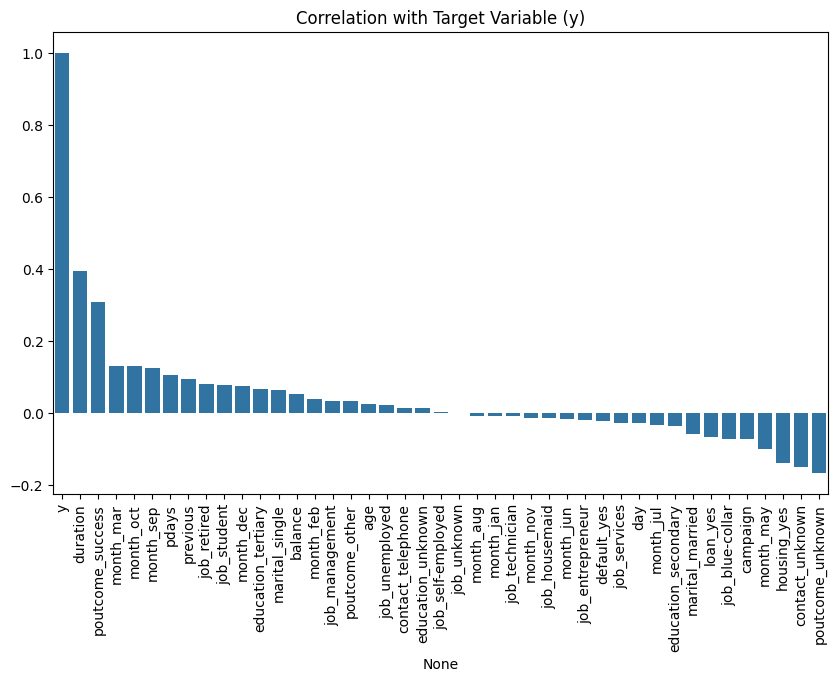

In [12]:
# Correlation Analysis
# Analyzing the correlation between features and the target variable

# Compute the correlation matrix
correlation_matrix = data.corr()

# Sort by correlation with target variable
target_correlation = correlation_matrix['y'].sort_values(ascending=False)
print(target_correlation)

# Visualizing correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlation.index, y=target_correlation.values)
plt.xticks(rotation=90)
plt.title('Correlation with Target Variable (y)')
plt.show()


                Feature  Importance
3              duration    0.275178
1               balance    0.101952
0                   age    0.098269
2                   day    0.088008
40     poutcome_success    0.051555
5                 pdays    0.042201
4              campaign    0.040019
24          housing_yes    0.021943
6              previous    0.019108
27      contact_unknown    0.014394
34            month_mar    0.013104
20  education_secondary    0.013043
18      marital_married    0.011955
21   education_tertiary    0.011594
15       job_technician    0.011013
33            month_jun    0.010642
10       job_management    0.010607
37            month_oct    0.010486
35            month_may    0.010368
25             loan_yes    0.009973
19       marital_single    0.009808
28            month_aug    0.009661
32            month_jul    0.009328
7       job_blue-collar    0.009195
36            month_nov    0.008749
41     poutcome_unknown    0.008641
30            month_feb    0

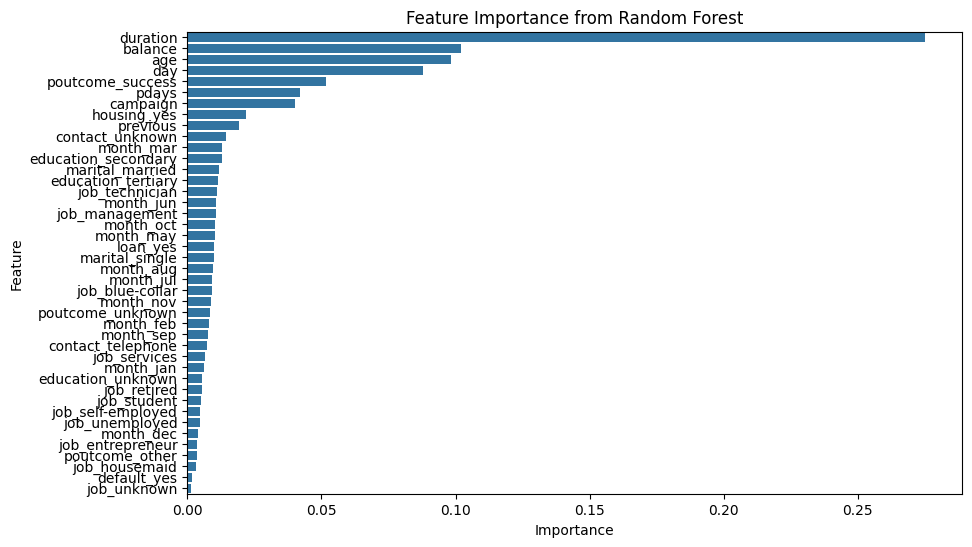

In [13]:
# Model-Based Feature Importance
# Using a Random Forest Classifier to rank feature importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Separating the features and target
X = data.drop('y', axis=1)
y = data['y']

# Fitting Random Forest for feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Visualizing feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance from Random Forest')
plt.show()


In [14]:
# Selecting Important Features

# Using a  SelectFromModel to automatically pick important features
selector = SelectFromModel(rf, threshold='mean')  # Selecting features above mean importance
selector.fit(X, y)

# Transforming the dataset to keep only selected features
X_selected = selector.transform(X)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'poutcome_success'],
      dtype='object')


In [15]:
# Train-Test Split

from sklearn.model_selection import train_test_split

# Converting X_selected back to a DataFrame for consistency
X_selected = pd.DataFrame(X_selected, columns=selected_features)

# Spliting the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (36168, 7)
Test set size: (9043, 7)


In [16]:
# Saving the datasets

X_train.to_csv('X_train_selected.csv', index=False)
X_test.to_csv('X_test_selected.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Downloading the files
from google.colab import files
files.download('X_train_selected.csv')
files.download('X_test_selected.csv')
files.download('y_train.csv')
files.download('y_test.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>